In [84]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
cars = pd.read_csv(r"C:\Users\meirk\Desktop\cars.csv")

In [39]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


let's look at the features:

**car_name:** name of the car.
**year:** year of manufacture.
**selling_price:** sale price.
**present_price:** Today's price.
**kms_driven:** How many kilomter traveled.
**fuel_type:** fuel type.
**seler_type:** selet_type.
**transmission:** gear type.
**owner:** owner number (how many owner were before).

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


I have some object type features, I will take care of it later when preparing the data to ML model.

Now, let's look at the numerica featurs: 

In [41]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [42]:
cars.shape

(301, 9)

The dataset has 9 columns and 301 rows.

## Exploring the data

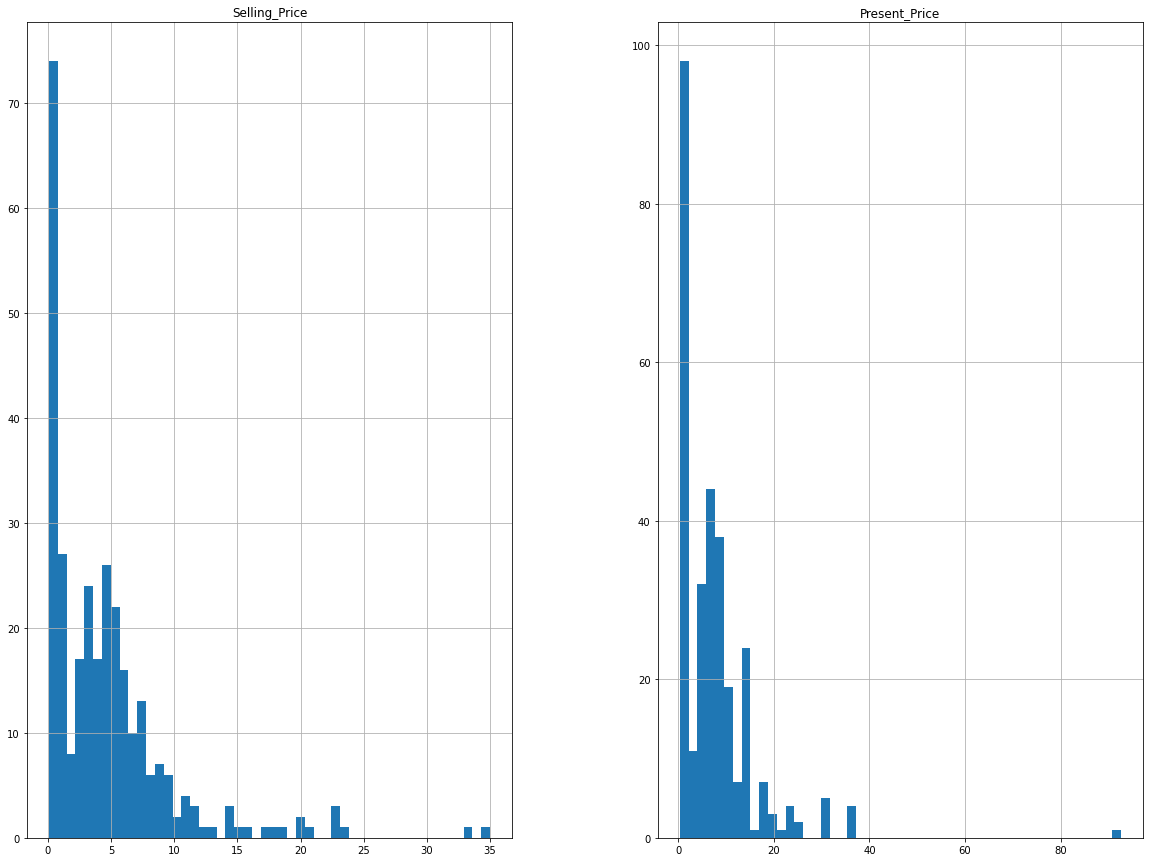

In [43]:
cars[['Selling_Price','Present_Price']].hist(bins = 50, figsize = (20,15))
plt.show()

In [177]:
cars['price_impairment'] = cars['Present_Price'] - cars['Selling_Price']
print("On average the price is low by "'%0.3f'%cars['price_impairment'].mean())

On average the price is low by 2.967


In [176]:
cars.loc[:,['Present_Price','Selling_Price','price_impairment']]

,Present_Price,Selling_Price,price_impairment
0,5.59,3.35,2.24
1,9.54,4.75,4.79
2,9.85,7.25,2.60
3,4.15,2.85,1.30
4,6.87,4.60,2.27
...,...,...,...
296,11.60,9.50,2.10
297,5.90,4.00,1.90
298,11.00,3.35,7.65
299,12.50,11.50,1.00


In [152]:
years = cars.groupby('Year')['Selling_Price'].mean()
years

Year
2003    1.300000
2004    1.500000
2005    2.487500
2006    1.437500
2007    0.160000
2008    1.002857
2009    2.816667
2010    5.262667
2011    2.375263
2012    3.841304
2013    3.540909
2014    4.762105
2015    5.927049
2016    5.213200
2017    6.209143
2018    9.250000
Name: Selling_Price, dtype: float64

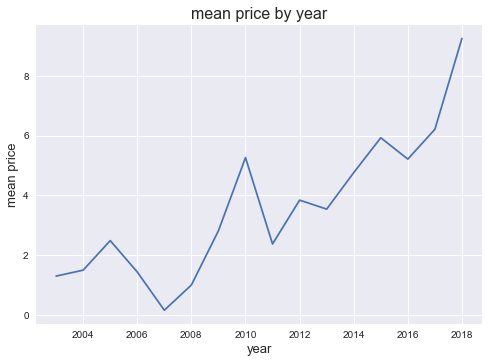

In [153]:
years.plot()
plt.xlabel("year", fontsize = 13)
plt.ylabel("mean price", fontsize = 13)
plt.title("mean price by year", fontsize = 16)
plt.grid(True)
plt.show()

I can observe that in general the mean sell price is going higher!

Another intresting thing to find is  how many KM each car traveld in average:

In [162]:
km_per_year = cars['Kms_Driven'] // (2019 - cars['Year']) 
pd.DataFrame({'km per year': km_per_year})

,km per year
0,5400
1,7166
2,3450
3,650
4,8490
...,...
296,11329
297,15000
298,8793
299,4500


In [178]:
print("The mean of KM per year is: "'%0.3f'%km_per_year.mean())

The mean of KM per year is: 6764.435


Let's see how many cars were manufacured each year:

In [105]:
how_many_year = pd.DataFrame({'How Many':cars.groupby('Year')['Car_Name'].count()})
how_many_year

,How Many
Year,
2003,2
2004,1
2005,4
2006,4
2007,2
2008,7
2009,6
2010,15
2011,19


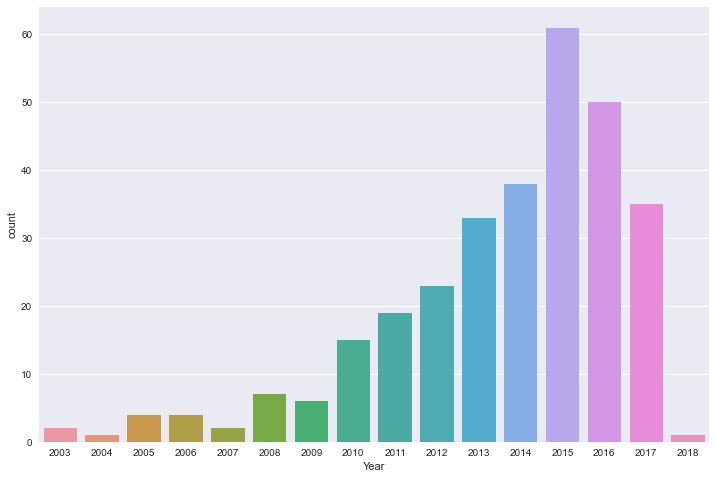

In [141]:
plt.figure(figsize=[12,8])
sns.countplot(x='Year',data=cars)
plt.show()

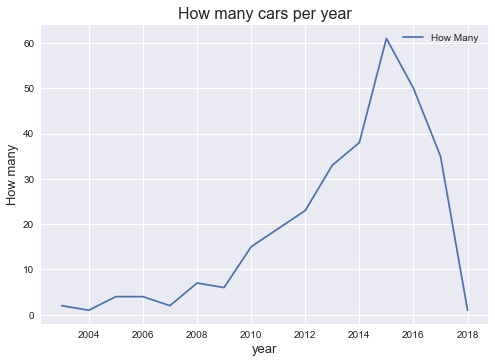

In [165]:
how_many_year.plot()
plt.xlabel("year", fontsize = 13)
plt.ylabel("How many", fontsize = 13)
plt.title("How many cars per year", fontsize = 16)
plt.grid(True)
plt.show()

I thought this is gonna be the pattern, but how interesting, every year the number of cars selling grew.

Alittle look at the categorical features: 

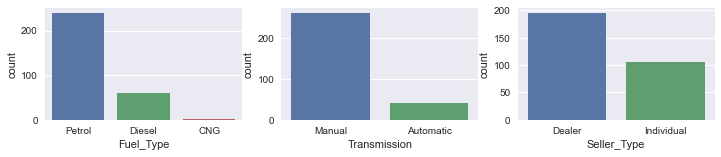

In [170]:
plt.figure(figsize=[12,7])
plt.subplot(3,3,1)
sns.countplot(x='Fuel_Type',data=cars)
plt.subplot(3,3,2)
sns.countplot(x='Transmission',data=cars)
plt.subplot(3,3,3)
sns.countplot(x='Seller_Type',data=cars)
plt.show()

In [183]:
owner_vs_present_price = cars.groupby("Owner")['Present_Price'].mean()
owner_price

Owner
0     7.721655
1     3.316000
3    23.730000
Name: Present_Price, dtype: float64

In [182]:
owner_vs_sell_price = cars.groupby("Owner")['Selling_Price'].mean()
owner_vs_sell_price

Owner
0    4.761552
1    1.970000
3    2.500000
Name: Selling_Price, dtype: float64